In [ ]:
import requests as rs

page = rs.get('https://www.kitalulus.com/lowongan?job_functions=&sort_by=isHighlighted')
page

<Response [200]>

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import time

# URL target
url = 'https://www.kitalulus.com/lowongan?job_functions=&sort_by=isHighlighted'

# Menyimpan hasil ke file CSV
csv_filename = 'job_listings.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Menulis header
    writer.writerow(['posisi', 'tautan', 'perusahaan', 'lokasi', 'pengalaman', 'keterampilan'])

    job_data = []

    page = 1
    while len(job_data) < 200:
        # Mendapatkan halaman web
        response = requests.get(url + f"&page={page}")

        # Memeriksa apakah permintaan berhasil
        if response.status_code == 200:
            # Menggunakan BeautifulSoup untuk parsing HTML
            soup = BeautifulSoup(response.content, 'html.parser')

            # Mengambil data pekerjaan (disesuaikan dengan struktur halaman)
            job_elements = soup.find_all('div', class_='CardRectangleStyled__Container-sc-1lom4v1-0 iwlPnJ')  # Sesuaikan dengan elemen asli

            for job in job_elements:
                posisi = job.find('h3').get_text().strip()  # Judul pekerjaan
                perusahaan = job.find('p').get_text().strip()
                tautan = 'https://www.kitalulus.com' + job.find('a')['href']  # Link ke pekerjaan

                job_response = requests.get(tautan)
                if job_response.status_code == 200:
                    job_soup = BeautifulSoup(job_response.content, 'html.parser')

                    # Mengambil lokasi
                    lokasi_element = job_soup.find('p', class_='TextStyled__Text-sc-18vo2dc-0 kaIrsv')
                    lokasi = lokasi_element.get_text().strip() if lokasi_element else 'Tidak tersedia'

                    pengalaman = 'Tidak tersedia'
                    pengalaman_elements = job_soup.find_all('p', class_='TextStyled__Text-sc-18vo2dc-0 kaIrsv')

                    for i, elem in enumerate(pengalaman_elements):
                        if "pengalaman" in elem.get_text().strip().lower():
                            if i+1 < len(pengalaman_elements):
                                pengalaman = pengalaman_elements[i+1].get_text().strip()
                            break

                    keterampilan_element = job_soup.find('div', class_='VacancyDescriptionStyled__Wrapper-sc-13uwtyz-2 cDTmUf')
                    keterampilan = keterampilan_element.get_text().strip() if keterampilan_element else 'Tidak tersedia'
                else:
                    lokasi = 'Tidak tersedia'
                    pengalaman = 'Tidak tersedia'
                    keterampilan = 'Tidak tersedia'

                job_data.append([posisi, tautan, perusahaan, lokasi, pengalaman, keterampilan])

                # Tampilkan jumlah data yang sudah di-scrape
                print(f"Data yang telah di-scrape: {len(job_data)}")

                # Berhenti jika sudah mendapatkan 50 data
                if len(job_data) >= 200:
                    break

            # Menambahkan jeda agar tidak terlalu sering melakukan permintaan
            time.sleep(1)
            page += 1
        else:
            print("Gagal mendapatkan halaman:", response.status_code)
            break

    # Menulis data
    writer.writerows(job_data)

print(f"Data berhasil disimpan ke {csv_filename}")

Data yang telah di-scrape: 1
Data yang telah di-scrape: 2
Data yang telah di-scrape: 3
Data yang telah di-scrape: 4
Data yang telah di-scrape: 5
Data yang telah di-scrape: 6
Data yang telah di-scrape: 7
Data yang telah di-scrape: 8
Data yang telah di-scrape: 9
Data yang telah di-scrape: 10
Data yang telah di-scrape: 11
Data yang telah di-scrape: 12
Data yang telah di-scrape: 13
Data yang telah di-scrape: 14
Data yang telah di-scrape: 15
Data yang telah di-scrape: 16
Data yang telah di-scrape: 17
Data yang telah di-scrape: 18
Data yang telah di-scrape: 19
Data yang telah di-scrape: 20
Data yang telah di-scrape: 21
Data yang telah di-scrape: 22
Data yang telah di-scrape: 23
Data yang telah di-scrape: 24
Data yang telah di-scrape: 25
Data yang telah di-scrape: 26
Data yang telah di-scrape: 27
Data yang telah di-scrape: 28
Data yang telah di-scrape: 29
Data yang telah di-scrape: 30
Data yang telah di-scrape: 31
Data yang telah di-scrape: 32
Data yang telah di-scrape: 33
Data yang telah di-

In [ ]:
import csv
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Mengunduh data yang diperlukan dari nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Inisialisasi Stemmer dan Lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stopwords bahasa Indonesia dan Inggris
stop_words = set(stopwords.words('indonesian')) | set(stopwords.words('english'))
additional_stop_words = {'tidak'}
stop_words.update(additional_stop_words)

# Fungsi preprocessing untuk pengalaman dan keterampilan
def preprocess_text(text):
    # Tambahkan spasi antara kata yang tidak memiliki spasi (misalnya "2Tahun" menjadi "2 Tahun")
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])|(?<=[a-z])(?=[A-Z])', ' ', text)
    # Hilangkan karakter non-alfabet kecuali angka
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Ubah ke huruf kecil
    text = text.lower()
    # Tokenisasi teks
    words = text.split()
    # Hilangkan stop words
    words = [word for word in words if word not in stop_words]
    # Lakukan stemming dan lemmatization pada setiap kata
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    # Gabungkan kembali kata-kata yang relevan
    return ' '.join(words)

# Nama file CSV awal dan hasil
input_csv = 'job_listings.csv'   # File CSV yang sudah ada
output_csv = 'job_listings_preprocessed.csv'  # File CSV dengan data yang diproses

# Membaca data dari file CSV awal
with open(input_csv, mode='r', encoding='utf-8') as infile, open(output_csv, mode='w', newline='', encoding='utf-8') as outfile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames  # Ambil header dari file awal
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)

    # Menulis header ke file output
    writer.writeheader()

    # Memproses setiap baris
    for row in reader:
        # Preprocess pengalaman
        if 'pengalaman' in row and row['pengalaman']:
            row['pengalaman'] = preprocess_text(row['pengalaman'])
        else:
            row['pengalaman'] = 'Tidak tersedia'

        # Preprocess keterampilan
        if 'keterampilan' in row and row['keterampilan']:
            row['keterampilan'] = preprocess_text(row['keterampilan'])
        else:
            row['keterampilan'] = 'Tidak tersedia'

        # Menulis baris yang telah diproses ke file baru
        writer.writerow(row)

print(f"Data hasil preprocessing berhasil disimpan ke {output_csv}")


Data hasil preprocessing berhasil disimpan ke job_listings_preprocessed.csv


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText

# Membaca data CSV hasil preprocessing
input_csv = 'job_listings_preprocessed.csv'
df = pd.read_csv(input_csv)

# Kolom target untuk feature engineering
pengalaman_column = 'pengalaman'
keterampilan_column = 'keterampilan'

# Mengisi nilai kosong dengan string kosong untuk kolom pengalaman dan keterampilan
df[pengalaman_column] = df[pengalaman_column].fillna('')
df[keterampilan_column] = df[keterampilan_column].fillna('')

# 1. Bag of Words (BoW) untuk Pengalaman dan Keterampilan
def extract_bow(texts):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(texts)
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

# 2. TF-IDF untuk Pengalaman dan Keterampilan
def extract_tfidf(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return tfidf_df

# 3. Word2Vec untuk Pengalaman dan Keterampilan
def extract_word2vec(texts):
    tokenized_texts = [text.split() for text in texts]
    w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
    w2v_features = [w2v_model.wv[text].mean(axis=0) if len(text) > 0 else [0]*100 for text in tokenized_texts]
    w2v_df = pd.DataFrame(w2v_features)
    return w2v_df

# 4. FastText untuk Pengalaman dan Keterampilan
def extract_fasttext(texts):
    tokenized_texts = [text.split() for text in texts]
    ft_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
    ft_features = [ft_model.wv[text].mean(axis=0) if len(text) > 0 else [0]*100 for text in tokenized_texts]
    ft_df = pd.DataFrame(ft_features)
    return ft_df

# Proses Feature Engineering untuk Pengalaman
bow_pengalaman = extract_bow(df[pengalaman_column])
tfidf_pengalaman = extract_tfidf(df[pengalaman_column])
word2vec_pengalaman = extract_word2vec(df[pengalaman_column])
fasttext_pengalaman = extract_fasttext(df[pengalaman_column])

# Proses Feature Engineering untuk Keterampilan
bow_keterampilan = extract_bow(df[keterampilan_column])
tfidf_keterampilan = extract_tfidf(df[keterampilan_column])
word2vec_keterampilan = extract_word2vec(df[keterampilan_column])
fasttext_keterampilan = extract_fasttext(df[keterampilan_column])

df['combined_features'] = df['pengalaman'] + ' ' + df['keterampilan']

# Ekstraksi fitur untuk kolom gabungan
bow_combined = extract_bow(df['combined_features'])
tfidf_combined = extract_tfidf(df['combined_features'])
word2vec_combined = extract_word2vec(df['combined_features'])
fasttext_combined = extract_fasttext(df['combined_features'])

# Menampilkan hasil untuk pengalaman dan keterampilan
print("\nHasil Feature Engineering untuk Pengalaman:")
print("Bag of Words (BoW) Pengalaman:\n", bow_pengalaman.head())
print("TF-IDF Pengalaman:\n", tfidf_pengalaman.head())
print("Word2Vec Pengalaman:\n", word2vec_pengalaman.head())
print("FastText Pengalaman:\n", fasttext_pengalaman.head())

print("\nHasil Feature Engineering untuk Keterampilan:")
print("Bag of Words (BoW) Keterampilan:\n", bow_keterampilan.head())
print("TF-IDF Keterampilan:\n", tfidf_keterampilan.head())
print("Word2Vec Keterampilan:\n", word2vec_keterampilan.head())
print("FastText Keterampilan:\n", fasttext_keterampilan.head())

# Menampilkan hasil Feature Engineering
print("\nHasil Feature Engineering:")
print("\nBag of Words (BoW) Combined Features:")
print(bow_combined.head())
print("\nTF-IDF Combined Features:")
print(tfidf_combined.head())
print("\nWord2Vec Combined Features:")
print(word2vec_combined.head())
print("\nFastText Combined Features:")
print(fasttext_combined.head())



Hasil Feature Engineering untuk Pengalaman:
Bag of Words (BoW) Pengalaman:
    ketentuan  minim
0          1      0
1          1      0
2          1      0
3          0      1
4          1      0
TF-IDF Pengalaman:
    ketentuan  minim
0        1.0    0.0
1        1.0    0.0
2        1.0    0.0
3        0.0    1.0
4        1.0    0.0
Word2Vec Pengalaman:
          0         1         2         3         4         5         6   \
0  0.000095  0.003077 -0.006813 -0.001375  0.007669  0.007346 -0.003673   
1  0.000095  0.003077 -0.006813 -0.001375  0.007669  0.007346 -0.003673   
2  0.000095  0.003077 -0.006813 -0.001375  0.007669  0.007346 -0.003673   
3 -0.004584  0.001955  0.005160  0.007398 -0.000936 -0.006662  0.003798   
4  0.000095  0.003077 -0.006813 -0.001375  0.007669  0.007346 -0.003673   

         7         8         9   ...        90        91        92        93  \
0  0.002643 -0.008317  0.006205  ... -0.004509  0.005702  0.009180 -0.004100   
1  0.002643 -0.008317  0.00620

# Clustering

In [ ]:
!pip install fasttext

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec, FastText
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fungsi untuk clustering K-means
def kmeans_clustering(features, n_clusters=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels) if len(set(cluster_labels)) > 1 else -1
    return cluster_labels, silhouette_avg

# Fungsi untuk clustering DBSCAN
def dbscan_clustering(features, eps=0.3, min_samples=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan_model.fit_predict(scaled_features)
    unique_labels = list(set(cluster_labels))
    cluster_labels = [unique_labels.index(label) if label != -1 else -1 for label in cluster_labels]
    silhouette_avg = silhouette_score(scaled_features, cluster_labels) if len(set(cluster_labels)) > 1 else -1
    return cluster_labels, silhouette_avg

# Contoh DataFrame
data = pd.read_csv('/content/job_listings_preprocessed.csv')
df = pd.DataFrame(data)

df['combined_features'] = df['pengalaman'] + ' ' + df['keterampilan']

# Clustering untuk fitur gabungan
kmeans_tfidf_combined_labels, kmeans_tfidf_combined_silhouette = kmeans_clustering(tfidf_combined, 3)
dbscan_tfidf_combined_labels, dbscan_tfidf_combined_silhouette = dbscan_clustering(tfidf_combined, eps=0.3, min_samples=3)

kmeans_bow_combined_labels, kmeans_bow_combined_silhouette = kmeans_clustering(bow_combined, 3)
dbscan_bow_combined_labels, dbscan_bow_combined_silhouette = dbscan_clustering(bow_combined, eps=0.3, min_samples=5)

kmeans_word2vec_combined_labels, kmeans_word2vec_combined_silhouette = kmeans_clustering(word2vec_combined, 3)
dbscan_word2vec_combined_labels, dbscan_word2vec_combined_silhouette = dbscan_clustering(word2vec_combined, eps=0.3, min_samples=3)

kmeans_fasttext_combined_labels, kmeans_fasttext_combined_silhouette = kmeans_clustering(fasttext_combined, 3)
dbscan_fasttext_combined_labels, dbscan_fasttext_combined_silhouette = dbscan_clustering(fasttext_combined, eps=0.3, min_samples=3)

# Menampilkan skor Silhouette
print("\nSilhouette Score untuk fitur gabungan (KMeans):")
print(f"KMeans TF-IDF: {kmeans_tfidf_combined_silhouette}")
print(f"KMeans BoW: {kmeans_bow_combined_silhouette}")
print(f"KMeans Word2Vec: {kmeans_word2vec_combined_silhouette}")
print(f"KMeans FastText: {kmeans_fasttext_combined_silhouette}")

print("\nSilhouette Score untuk fitur gabungan (DBSCAN):")
print(f"DBSCAN TF-IDF: {dbscan_tfidf_combined_silhouette}")
print(f"DBSCAN BoW: {dbscan_bow_combined_silhouette}")
print(f"DBSCAN Word2Vec: {dbscan_word2vec_combined_silhouette}")
print(f"DBSCAN FastText: {dbscan_fasttext_combined_silhouette}")



Silhouette Score untuk fitur gabungan (KMeans):
KMeans TF-IDF: 0.1686203341378723
KMeans BoW: 0.17485088245881023
KMeans Word2Vec: 0.22635291516780853
KMeans FastText: 0.26638859510421753

Silhouette Score untuk fitur gabungan (DBSCAN):
DBSCAN TF-IDF: 0.9999999820619563
DBSCAN BoW: 0.999999985458284
DBSCAN Word2Vec: 1.0
DBSCAN FastText: 1.0


In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Fungsi untuk clustering K-means
def kmeans_clustering(features, n_clusters=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(scaled_features)
    davies_bouldin_avg = davies_bouldin_score(scaled_features, cluster_labels) if len(set(cluster_labels)) > 1 else -1
    return cluster_labels, davies_bouldin_avg

# Fungsi untuk clustering DBSCAN
def dbscan_clustering(features, eps=0.3, min_samples=3):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan_model.fit_predict(scaled_features)
    unique_labels = list(set(cluster_labels))
    cluster_labels = [unique_labels.index(label) if label != -1 else -1 for label in cluster_labels]
    if len(set(cluster_labels)) > 1:
        davies_bouldin_avg = davies_bouldin_score(scaled_features, cluster_labels)
    else:
        davies_bouldin_avg = -1  # Jika hanya ada satu cluster, Davies-Bouldin score tidak dapat dihitung
    return cluster_labels, davies_bouldin_avg

data = pd.read_csv('/content/job_listings_preprocessed.csv')
df = pd.DataFrame(data)

df['combined_features'] = df['pengalaman'] + ' ' + df['keterampilan']

# Clustering untuk fitur gabungan
kmeans_tfidf_combined_labels, kmeans_tfidf_combined_davies_bouldin = kmeans_clustering(tfidf_combined, 3)
dbscan_tfidf_combined_labels, dbscan_tfidf_combined_davies_bouldin = dbscan_clustering(tfidf_combined, eps=0.3, min_samples=3)

kmeans_bow_combined_labels, kmeans_bow_combined_davies_bouldin = kmeans_clustering(bow_combined, 3)
dbscan_bow_combined_labels, dbscan_bow_combined_davies_bouldin = dbscan_clustering(bow_combined, eps=0.3, min_samples=3)

kmeans_word2vec_combined_labels, kmeans_word2vec_combined_davies_bouldin = kmeans_clustering(word2vec_combined, 3)
dbscan_word2vec_combined_labels, dbscan_word2vec_combined_davies_bouldin = dbscan_clustering(word2vec_combined, eps=0.3, min_samples=3)

kmeans_fasttext_combined_labels, kmeans_fasttext_combined_davies_bouldin = kmeans_clustering(fasttext_combined, 3)
dbscan_fasttext_combined_labels, dbscan_fasttext_combined_davies_bouldin = dbscan_clustering(fasttext_combined, eps=0.3, min_samples=3)

# Menampilkan skor Davies-Bouldin
print("\nDavies-Bouldin Index untuk fitur gabungan (KMeans):")
print(f"KMeans TF-IDF: {kmeans_tfidf_combined_davies_bouldin}")
print(f"KMeans BoW: {kmeans_bow_combined_davies_bouldin}")
print(f"KMeans Word2Vec: {kmeans_word2vec_combined_davies_bouldin}")
print(f"KMeans FastText: {kmeans_fasttext_combined_davies_bouldin}")

print("\nDavies-Bouldin Index untuk fitur gabungan (DBSCAN):")
print(f"DBSCAN TF-IDF: {dbscan_tfidf_combined_davies_bouldin}")
print(f"DBSCAN BoW: {dbscan_bow_combined_davies_bouldin}")
print(f"DBSCAN Word2Vec: {dbscan_word2vec_combined_davies_bouldin}")
print(f"DBSCAN FastText: {dbscan_fasttext_combined_davies_bouldin}")



Davies-Bouldin Index untuk fitur gabungan (KMeans):
KMeans TF-IDF: 1.1119923719178737
KMeans BoW: 1.0752802573018918
KMeans Word2Vec: 1.671592075170816
KMeans FastText: 1.6360278124735217

Davies-Bouldin Index untuk fitur gabungan (DBSCAN):
DBSCAN TF-IDF: 3.3952683129414426e-08
DBSCAN BoW: 3.473471442716816e-08
DBSCAN Word2Vec: 1.5775656386290757e-07
DBSCAN FastText: 1.730435448023713e-07


**KMEANS CLUSTERING DAN DBSCAN CLUSTERING**


Visualisasi Distribusi Cluster:


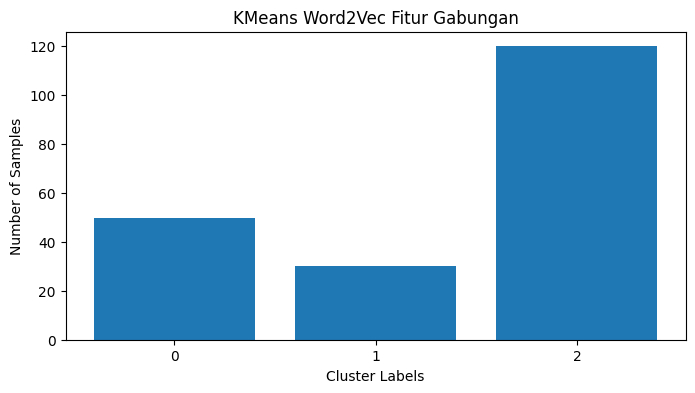

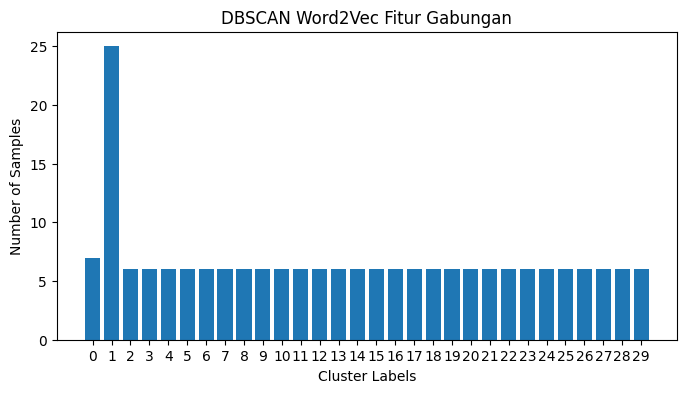

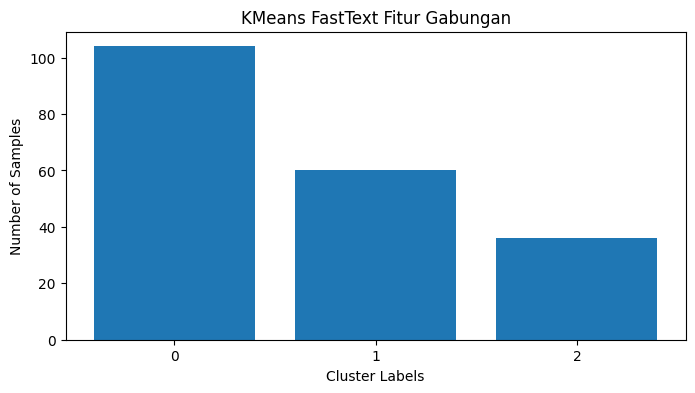

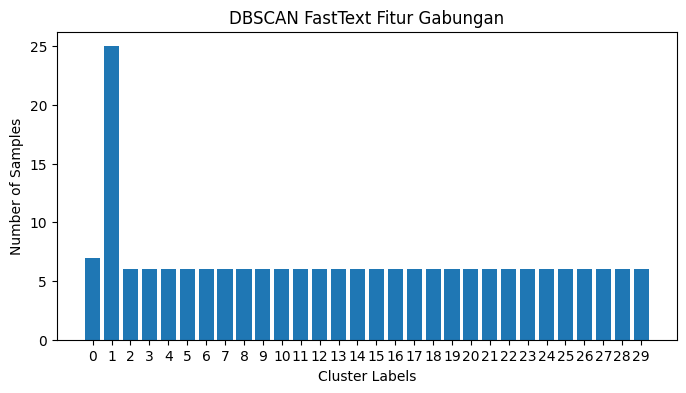

In [ ]:
# Fungsi untuk menampilkan hasil clustering menggunakan diagram batang
def plot_cluster_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 4))
    plt.bar(unique, counts, tick_label=unique)
    plt.xlabel('Cluster Labels')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.show()

# Visualisasi Hasil Clustering
print("\nVisualisasi Distribusi Cluster:")

plot_cluster_distribution(kmeans_word2vec_combined_labels, "KMeans Word2Vec Fitur Gabungan")
plot_cluster_distribution(dbscan_word2vec_combined_labels, "DBSCAN Word2Vec Fitur Gabungan")
plot_cluster_distribution(kmeans_fasttext_combined_labels, "KMeans FastText Fitur Gabungan")
plot_cluster_distribution(dbscan_fasttext_combined_labels, "DBSCAN FastText Fitur Gabungan")

In [ ]:
df['KMeans_Word2Vec_Labels'] = kmeans_word2vec_combined_labels
df['DBSCAN_Word2Vec_Labels'] = dbscan_word2vec_combined_labels
df['KMeans_FastText_Labels'] = kmeans_fasttext_combined_labels
df['DBSCAN_FastText_Labels'] = dbscan_fasttext_combined_labels

# Menyimpan dataframe dengan label cluster ke file CSV baru
output_csv = 'job_listings_with_clusters_combined.csv'
df.to_csv(output_csv, index=False)
print(f"Hasil clustering disimpan ke {output_csv}")

# Menampilkan beberapa baris hasil clustering
print("\nDataFrame dengan label cluster:")
df.head()

Hasil clustering disimpan ke job_listings_with_clusters_combined.csv

DataFrame dengan label cluster:


,posisi,tautan,perusahaan,lokasi,pengalaman,keterampilan,combined_features,KMeans_Word2Vec_Labels,DBSCAN_Word2Vec_Labels,KMeans_FastText_Labels,DBSCAN_FastText_Labels
0,Freelance Work From Home Misi Seru Admin (Q) -...,https://www.kitalulus.com/lowongan/detail/free...,Freelance MisiSeru - KitaLulus,"Kota Tangerang, Banten",ketentuan,avradministrasi,ketentuan avradministrasi,0,0,0,0
1,Misi Seru Bekerja dari rumah admin freelance R...,https://www.kitalulus.com/lowongan/detail/misi...,Freelance MisiSeru - KitaLulus,"Jakarta Selatan, DKI Jakarta",ketentuan,administrasi,ketentuan administrasi,0,1,0,1
2,Recruitment Freelance Admin (WFH/Remote) Misi ...,https://www.kitalulus.com/lowongan/detail/recr...,Freelance MisiSeru - PT. Kita Lulus Internasional,"Jakarta Barat, DKI Jakarta",ketentuan,administrasi,ketentuan administrasi,0,1,0,1
3,TUTOR BAHASA INGGRIS ( PERSIAPAN UTBK),https://www.kitalulus.com/lowongan/detail/tuto...,Radian Edu Solution,"Kota Bekasi, Jawa Barat",minim 1,manajemen efektif kerja tim keterampilan komun...,minim 1 manajemen efektif kerja tim keterampil...,2,2,0,2
4,Customer Service Representative - KEDIRI,https://www.kitalulus.com/lowongan/detail/cust...,PT Mitracomm Ekasarana,"Kota Kediri, Jawa Timur",ketentuan,berbicara alat komunikasi berinteraksi analiti...,ketentuan berbicara alat komunikasi berinterak...,2,3,0,3



Visualisasi PCA untuk fitur gabungan:


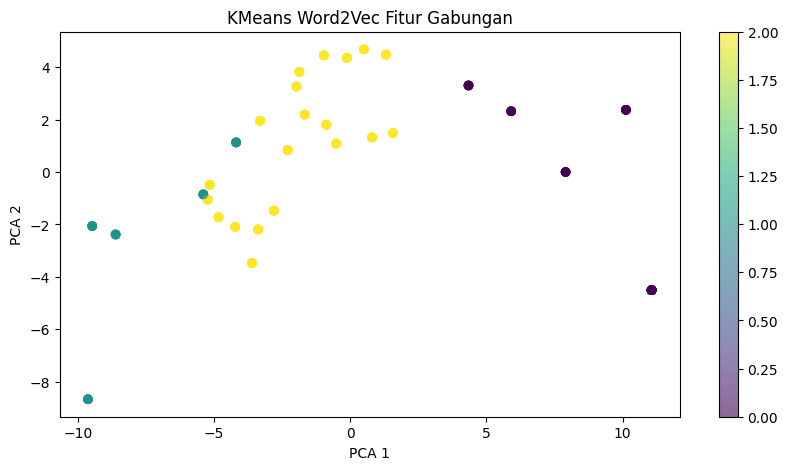

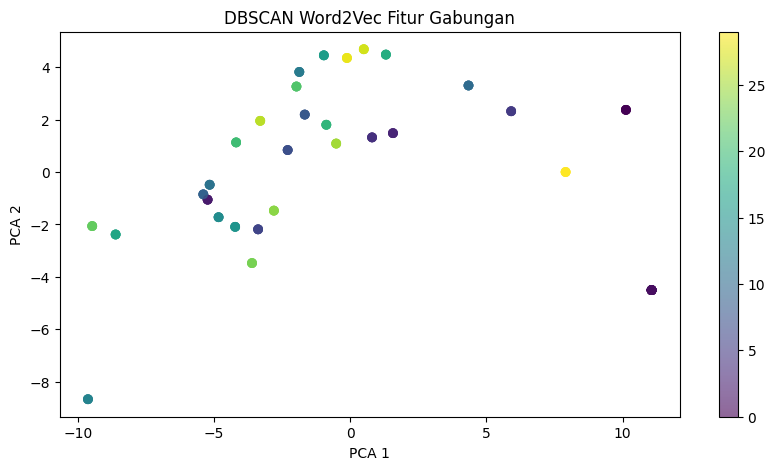

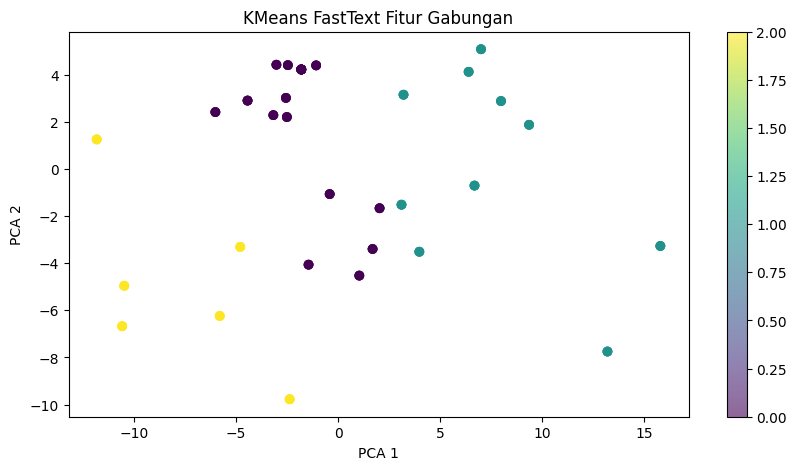

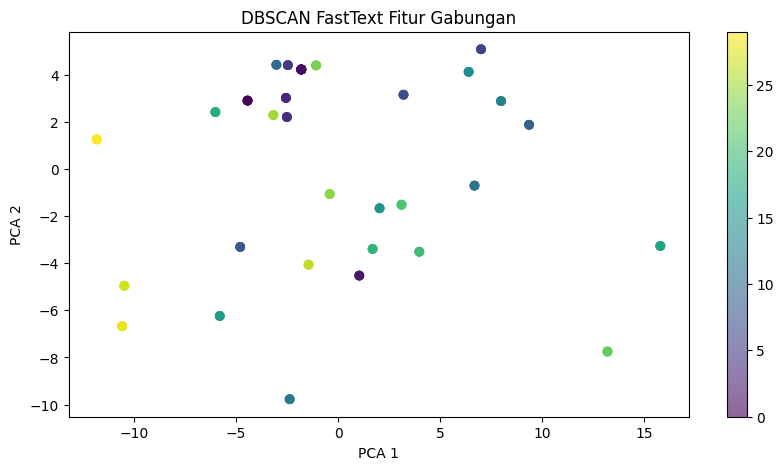

In [ ]:
# Visualisasi PCA
def plot_pca(features, cluster_labels, title):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)
    plt.figure(figsize=(10, 5))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar()
    plt.show()

# Visualisasi PCA
print("\nVisualisasi PCA untuk fitur gabungan:")

# Fitur gabungan
plot_pca(word2vec_combined, kmeans_word2vec_combined_labels, "KMeans Word2Vec Fitur Gabungan")
plot_pca(word2vec_combined, dbscan_word2vec_combined_labels, "DBSCAN Word2Vec Fitur Gabungan")
plot_pca(fasttext_combined, kmeans_fasttext_combined_labels, "KMeans FastText Fitur Gabungan")
plot_pca(fasttext_combined, dbscan_fasttext_combined_labels, "DBSCAN FastText Fitur Gabungan")

# Menyimpan hasil clustering ke file CSV
df['kmeans_word2vec_combined_cluster'] = kmeans_word2vec_combined_labels
df['dbscan_word2vec_combined_cluster'] = dbscan_word2vec_combined_labels
df['kmeans_fasttext_combined_cluster'] = kmeans_fasttext_combined_labels
df['dbscan_fasttext_combined_cluster'] = dbscan_fasttext_combined_labels
